# Cleaning & Wrangling

## SECTION I. Read in the data

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options
%matplotlib inline
pd.options.display.max_columns = 150

In [ ]:
# If a document:
df = pd.read_csv("document.csv", #specific things youd like to include based on the data in csv)

#naming columns for a dataframe
colnames= ['column1', 'column2', 'etc']

# If a url
url = 'https://entire_url'
test_data = pd.read_csv(url)

df = pd.read_csv(url #can also specify arguments in here like colnames)

display(df)

In [ ]:
# Count the number of rows in your data
number_of_samples = df.count()

# View it
print("Number of samples:", str(number_of_samples))

## Section II: Loops/file manipulation

This section from: https://github.com/lkahre/practice_notebooks/blob/master/file_manip_looping.ipynb

      Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/

      NumPy documentation: https://docs.scipy.org/doc/numpy/

Pandas

In [ ]:
#Pandas is easy. It's possible to use other methods, but hard with mixed datatypes.
import pandas as pd

filename = 'filename.csv'
data = pd.read_csv(filename)  # Can specify separators
display(data)

NumPy

In [ ]:
import numpy as np
#Gives you a structured array
filename = 'filename.csv'
NumPy = np.genfromtxt(filename, delimiter=',', names=True, dtype=None)  
    #names=True tells us there's a header
    #dtype=None let's you work with mixed datatypes

#Check
display(NumPy[:50])

Basic Python Lists

In [ ]:
#Basic Python file
import csv

filename = 'filename.csv'
f = open(filename)
csv_f = csv.reader(f)

data_basic = []  #Generate list to dump data into

#Check file input
for row in csv_f:
    data_basic.append(row)
f.close()
print(data_basic[:5])

Looping

For Loops

Can loop using index numbers or patterns.
Python supports single-line looping- the most common use is in "lambda" (anonymous) functions.

In [ ]:
#Pandas:
#Using iterrows:
for index, row in data_pandas.iterrows():
    #do things- gonna tell it to do nothing for now, but print statement in comment
    #print (row['state'], row['jail'])
    pass

#Using itertuples
for row in data_pandas.itertuples(index=True, name='Pandas'):
    #do things- gonna tell it to do nothing for now, but print statement in comment
    #print (getattr(row, 'state'), getattr(row, 'jail'))
    pass

#Single-line apply changes with lambda function
def replace_blanks(x):
    import math
    if math.isnan(x):
        return 0
    else:
        pass

data_pandas['column'] = data_pandas.apply(lambda row: replace_blanks(row['jail']), axis=1)

In [ ]:
#Numpy:
num_rows = data_numpy.shape[0]
for i in range(num_rows):    #Loop through using index numbers and range()
    #do things- gonna tell it to do nothing for now, but print statement in comment
    #print (data_numpy[i])    #if trying to print specific columns, access via 
                                #data_numpy['colname'][i]
    pass
#This is set up for the structured array to access row-by-row. Can iterate through columns
#in a basic 2d array via array[colnum, rownum].

In [ ]:
#Basic lists:
for row in data_basic:       #Loop through using pattern loops
    #do things- gonna tell it to do nothing for now, but print statement in comment
    #print (row)
    pass

While Loops

In [ ]:
#Should be similar with all data types- careful, it's possible to build an infinite loop.
#Slower than for-loops. Use only if you can't reframe it into a for-loop without break 
#statement shenanigans. The following example is a bad example for syntax reference only- 
#this iteration should be a for-loop.

end = False
n = len(data_basic)
i = 0

while end != True:
    #do things- gonna tell it to do nothing for now, but print statement in comment
    #print(data_basic[i])
    i += 1
    if i == n:
        end = True
    else:
        end = False

Loop Control

- Break statements terminate loop that contains it. If in nested structure, will only terminiate innermost loop. - Continue statements skip remaining loop commands then proceed to the next iteration. - Pass statements do nothing. Can be used when syntax requires a statement, but program requires no action.

In [ ]:
for row in data_basic:
    value = row[3]
    if len(value) == 0:  #If value does not exist in that column for current row, end loop
        break
    else:
        print(value)

In [ ]:
for row in data_basic:
    value = row[3]
    if len(value) == 0:  #If value does not exist in that column for current row, skip to next iteration
        continue
    else:
        print(value)

In [ ]:
totrows = 0
fullrows = 0

for row in data_basic:
    value = row[3]
    if len(value) == 0:  #If value does not exist in that column for current row, do nothing.
        pass
    else:
        fullrows += 1
    totrows += 1
print("Number of rows:", str(totrows))
print("Full rows:", str(fullrows))

File Output

In [ ]:
#First, with pandas:
data_pandas.to_csv('resave_felon_disenfranchisement_pandas.csv')

#NumPy:

#np.tofile('resave_felon_disenfranchisement_numpy.csv', data_numpy, sep=',')
data_numpy.tofile('resave_felon_disenfranchisement.csv', sep=',')

#Now basic list:

with open('resave_felon_disenfranchisement_basic.csv', 'w+') as myfile:
    wr = csv.writer(myfile, delimiter=',')
    wr.writerows(data_basic)

## Section III: Check out the data

In [ ]:
df.shape #number of rows X # columns

In [ ]:
df.info() #all the info (col names, dtypes, row #, missing values) 
# remember that nulls may still be present but just not detectable as such by Pandas (e.g. a "?")

In [ ]:
df.head(10) #first ten rows
df.tail(100) #last 100 rows

In [ ]:
df.describe #descriptive stats for the df

In [ ]:
df.columns #what are the column names

In [ ]:
df.count() #count for each column

In [ ]:
df.column_name.max()
df.column_name.min()
df.column_name.mean()
df.column_name.median()
df.column_name.mode()
df.column_name.sum()

In [ ]:
# print every unique thing using python's built-in set
print(set(df['column']))

## Section IV: Series, DataFrames and Indices

Pandas Series: Basically it is one column of the DataFrame. (An indexed, one-dimensional array with a dtype (int, float, str, etc.).

Conversely, a Pandas DF is a collection of Series with a common index (or joined on the index if you join series to a df or join multiple series to create a df). Each series can have a diff. dtype.


In [ ]:
# checking out a series from a df
df['column_name'].head(5)

#checking out more than one from a df
df[['colName', 'colName']].head(10)

In [ ]:
#converting index to list to see first 10 elements
list(df.index)[:10]

In [ ]:
#look at rows 3-9
df[3:10]

In [ ]:
# look at specific columns and rows using their numerical (indexed) location (iloc)
# dataframe.iloc[start_row_index:not_inclusive_end_row_index, start_col_index:not_inclusive_end_col_index,]
df.iloc[3:5, 2:4]

In [ ]:
# BUT WAIT This one is odd for python, the end of the range IS inclusive in this case (when you use .loc)
#mixing it up with row numbers and column names wooooooiiiieee
df.loc[3:5, ['colName','colName2']]

## Section V: Filtering to view specific data

Filtering is done by passing a Boolean Series to the DataFrame. 
This Boolean Series can be generated by applying operations to other Series in the DataFrame and can be combined in many ways.

AND is given by &
OR is given by |
NOT is given by ~

Parentheses are important --these operators take precedence. 
A > 1 & B > 2 will be parsed as A > (1 & B) > 2 , this will fail because 1 & B doesn't mean anything alone.

In [ ]:
(df.year > 2014 ).head() #returns a Boolean for every value of rows in the head for which the year column is > 2014

In [ ]:
#But, if you do this:

df[df.year >= 2014].head(15)

#You will get a df (with all the columns) with the first 15 rows of the dataframe for which the year column
is >= 2014

In [ ]:
#combining filters

df[(df.year >= 2014) & (df.species == 'Gorilla gorilla') & ~(df.subspecies == 'berengei')].head(10)
# Give me the first ten rows in the df where the year is >= 2014 AND the species is Gorilla gorilla 
# AND the subspecies is NOT berengei 
# G.g. berengei are Mountain Gorillas :)

In [ ]:
#change values using a filter
#AHH 2024 should have been 2014, here is how I fix this
myfilter = (df.year == 2024)
df.loc[myfilter, 'year'] = 2014 

## Section VI: Drop it like it's hot

In [ ]:
df.drop(['year'], axis=1).head(5) #show me first 5 rows with year column dropped
df=df.drop(['year'], axis=1) #drop the entire year column from the whole df


In [ ]:
# Drop duplicates in a column
df[['year']].drop_duplicates().head(10) # show me first 10 unique years in the df

In [ ]:
# Drop all rows with Na values
df.dropna(axis=0)

## Section VII: Sort_values

In [ ]:
# sort by these columns first by the column values then by the rows (the [1,0])
df.sort_values(by = ['year', 'species'], ascending = [1, 0]).head()

## Section VIII: Fill NA - Missing values

In [ ]:
df.fillna(-1).head() #fill missing values with -1

In [ ]:
# are there any missing values? returns boolean
df.isna()
df.isnull()

## Section IX: Grouping & Merging

In [ ]:
# Pandas aggregation with only one function:
df_by_color = df_nn.groupby(['color'])['yc_g', 'yr_g', 'rc_g', 'red'].mean()
                                                
# to convert hierarchical index to normal dataframe
df_by_color = df_by_color.reset_index()

In [ ]:
# Merging data frames
combined_df = pd.merge(df1, df2, on='column_with_matching_data_in_both_dfs', how='outer')

# outer keeps all rows
# and will fill in missing data with NaNs, inner will only have rows of df1 and the matches that were in df2 
# (anything in df2 that isn't in the column you matched on in df1 will not be included)

# good to check and make sure you did this correctly, e.g. if you want ALL the samples, make sure the new (merged) 
# df has the same count as the df (df1 or df2) with the larger # of rows

#check
num_combined = combined_df.count()
print('Number of combined:', str(num_combined))

## Section X: Other DataFrame Manipulations

In [ ]:
# make a column with new values based on values in another column 

def label_col (row):
   if row['up_to_date'] == 1 :
      return 0
   if row['up_to_date'] == 0 :
      return 1
   
df.apply (lambda row: label_col (row),axis=1)
#if you like the results then run it again and create a new col in the df with the results:
df['new_col'] = df.apply (lambda row: label_col (row),axis=1)

In [ ]:
# One-Hot Encoding for continuous variables because they cannot be sorted and you need this for many ML algorithms

In [ ]:
#change to str if not already
df['continuous_var_col'] = df['continuous_var_col'].astype(str)
df_wide = pd.get_dummies(df[['cont_var_col_1','cont_var_col_2', 'cont_var_col_n']])
df = pd.merge(df, df_wide, left_index=True, right_index=True)
df_wide.head()

DateTime

In [9]:
#Change data types to datetime formats
#import datetime package
import datetime as dt
from datetime import date
from datetime import time
from datetime import datetime


In [10]:
#adding padded zeros to 3-digit times
#first convert to a str
df['issueTime'] = df['issueTime'].astype(str)

df['issueTime'] = df['issueTime'].apply(lambda x: x.zfill(4))

In [11]:
df.head()

,Ticket number,Issue Date,Issue time,Marked Time,Make,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,issueTime
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,HOND,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,1251
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,GMC,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,1435
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NISS,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,2055
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,ACUR,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2,1515
4,1105461453,2015-09-15T00:00:00,115.0,NaN,CHEV,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,0115


In [12]:
#delete everything but the date from the issue date and put in a new column

df['IssueDateNew'] = df['Issue Date'].apply(lambda x: x.replace('T00:00:00', ''))

In [19]:
#combine issue date and issue time
# name is dt_issued
#first make sure it will work by printing : print(df.IssueDateNew + ' ' + df.issueTime )

In [15]:
df['datetime_issued'] = (df['IssueDateNew'] + ' ' + df['issueTime'])

In [16]:
df.datetime_issued.head()


0    2015-12-21 1251
1    2015-12-21 1435
2    2015-12-21 2055
3    2015-12-26 1515
4    2015-09-15 0115
Name: datetime_issued, dtype: object

In [17]:
#Convert to date time format
df['datetime_issued']=pd.to_datetime(df['datetime_issued'], format='%Y-%m-%d %H%M')

In [19]:
# convert IssueDateNew to a date
df['IssueDateNew '] = pd.to_datetime(df['IssueDateNew'])

In [20]:
df['issueTime']=pd.to_datetime(df['issueTime'], format='%H%M').dt.time

In [23]:
df.dtypes

Ticket number                    object
Issue Date                       object
Issue time                      float64
Marked Time                     float64
Make                             object
Location                         object
Route                            object
Agency                          float64
Violation code                   object
Violation Description            object
Fine amount                     float64
Latitude                        float64
Longitude                       float64
issueTime                        object
IssueDateNew                     object
datetime_issued          datetime64[ns]
IssueDateNew             datetime64[ns]
dtype: object

In [24]:
#to check and make sure conversion worked
print(df['issueTime'][0].minute)    #should print just the minute
#print(df['Issue time'][0].hour)    #should print just the hour

51


In [25]:
#take year from the Issue Date column and make it into a new separate column
df['issueYear'] = pd.DatetimeIndex(df['Issue Date']).year

In [24]:
#to check and make sure conversion worked
print(df['issueTime'][0].minute)    #should print just the minute
#print(df['Issue time'][0].hour)    #should print just the hour

51


In [25]:
#take year from the Issue Date column and make it into a new separate column
df['issueYear'] = pd.DatetimeIndex(df['Issue Date']).year

In [27]:
# make a new column with the day of the week the ticket was issued
df['weekday'] = pd.DatetimeIndex(df['Issue Date']).dayofweek

In [28]:
df['month'] = pd.DatetimeIndex(df['Issue Date']).month

In [30]:
#go through one by one to VERIFY which columns to drop and keep and mark them below
#print(df['Issue Date'][0].day)    #should print just the day
#print(df['Issue time'][0].hour)    #should print just the hour
#print(df['issueTime'][0].minute)    #should print just the minute
#print(df['IssueDateNew'][0].day)    #should print just the day
#print(df['dt_issued'][0].minute)    #should print just the minute
print(df['datetime_issued'][0].minute)    #should print just the minute


51


In [47]:
####### Issue Date                       object #DROP
####### Issue time                       object #DROP
####### IssueDateNew                     object #DROP
####### dt_issued                        object #DROP


In [31]:

#fix the column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','')


In [51]:
columns = ['issuedate', 'issuedatenew']
df = df.drop(columns, axis=1)
#df.drop(columntodrop, axis=1)
#columntodrop = df.iloc[:,14]

In [56]:
df["violationdescription"].isnull().sum()

0

In [34]:
df = df[~df["violationdescription"].isnull()] 

In [51]:
#to put in prep for scatterplot sheet
#dfnew.head()
columns = ['Issue Date', 'Issue time', "Meter Id", "RP State Plate", "Plate Expiry Date", "VIN", "Make", "Body Style", "Color", "Agency", "Fine amount"]

dfnew = dfnew.drop(columns, axis=1)

In [54]:


#fix the column names
dfnew.columns = dfnew.columns.str.lower()
dfnew.columns = dfnew.columns.str.replace(' ','')

dfnew.head()

,ticketnumber,markedtime,location,route,violationcode,violationdescription,latitude,longitude
0,1103341116,NaN,13147 WELBY WAY,01521,4000A1,NO EVIDENCE OF REG,99999.0,99999.0
1,1103700150,NaN,525 S MAIN ST,1C51,4000A1,NO EVIDENCE OF REG,99999.0,99999.0
2,1104803000,NaN,200 WORLD WAY,2R2,8939,WHITE CURB,6439997.9,1802686.4
3,1104820732,NaN,100 WORLD WAY,2F11,000,17104h,6440041.1,1802686.2
4,1105461453,NaN,GEORGIA ST/OLYMPIC,1FB70,8069A,NO STOPPING/STANDING,99999.0,99999.0


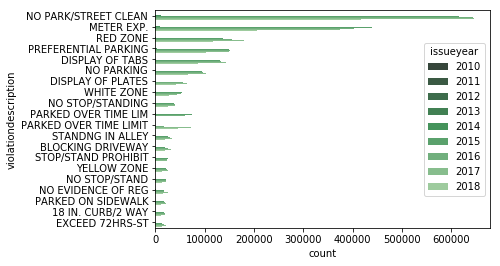

In [76]:

sns.countplot(y="violationdescription", hue="issueyear", data=df, palette="Greens_d",
              order=df.violationdescription.value_counts().iloc[:20].index)